# Завдання на використання SQL в Python

1.Встановіть бібліотеку `mysql-connector-python` через pip aбо через conda.

In [ ]:
!pip install mysql-connector-python
import mysql.connector
from mysql.connector import (connection)
import datetime
import matplotlib.pyplot as plt
import pandas as pd

2.В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робилось в лекції:

In [ ]:
con = connection.MySQLConnection(user='user1', password='7oygWy6P',
                              host='3.68.62.36',
                              database='employees')

3.Виберіть максимальну і мінімальну дати найму співробітників використовуючи `con.cursor()`. Аби отримати результати в кінці, виконайте `cursor.fetchall()`.

In [ ]:
cursor = con.cursor()

In [ ]:
sql = '''
SELECT MAX(hire_date), MIN(hire_date)
FROM employees
'''
cursor.execute(sql)

In [ ]:
cursor.fetchall()

[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]

Очікуваний результат:  
    `[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]`

4.Давайте зберемо інформацію про останню ЗП кожного співробіткника в базі. З використанням `con.cursor()` виберіть з таблиці `salaries` для кожного співробітника його номер, останню в базі даних (тобто ту, що відповідає найновішій `to_date`) ЗП, та значення `from_date`, `to_date` для цієї ЗП.

Результати запишіть у pandas DataFrame, який збережіть у змінну `res`. Як взяти з курсора назви колонок - вже наведено. На екран виведіть назви колонок в змінній `res`, розмір цього датафрейму та перші 3 записи в ньому.

УВАГА! Зверніть увагу, що ЗП може оновлюватись протягом одного дня, тобто є випадки, коли апдейт ЗП був в певний день, скажімо 2001-01-01 і потім стався ще один апдейт ЗП цьому співробітнику цього самого дня. Запит має це враховувати.
Також, теоретично ЗП може бути зменшена. Тож, брати дату з максимальною ЗП буде неправильно з точки зору бізнес логіки. Треба саме останнє історичне значення ЗП кожного співробітника.

In [ ]:
con = connection.MySQLConnection(user='user1', password='7oygWy6P',
                              host='3.68.62.36',
                              database='employees')

In [ ]:
cursor = con.cursor()

In [ ]:
sql = '''
SELECT s.emp_no, s.salary, s.from_date, s.to_date
    FROM salaries s
    INNER JOIN (
        SELECT emp_no, MAX(to_date) AS latest_to_date
        FROM salaries
        GROUP BY emp_no
    ) latest_salary ON s.emp_no = latest_salary.emp_no
    WHERE s.to_date = latest_salary.latest_to_date
    ORDER BY s.emp_no
'''
cursor.execute(sql)

In [ ]:
field_names = [i[0] for i in cursor.description]

In [ ]:
result = cursor.fetchall()

In [ ]:
res = pd.DataFrame(result, columns=field_names)

In [ ]:
display(field_names, res.shape, res.head(3))

['emp_no', 'salary', 'from_date', 'to_date']

(300180, 4)

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01


In [ ]:
cursor.close()

True

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1lNvzbAebtkj3C2v-I5AE6HkMH8MTI1kA)

5.В утвореній вибірці в змінній `res` скільки значень `to_date` рівні `9999-01-01`, а скільки - ні? Увага! Для виконання цього завдання важливо розуміти, який тип даних у значень колонки `to_date`. Зʼясуйте це, і потім напишіть фільтр для виводу потрібного результату.

In [ ]:
print(res['to_date'].dtype)

object


In [ ]:
to_date_9999 = res[res['to_date'].astype(str) == '9999-01-01']
to_date_not_9999 = res[res['to_date'].astype(str) != '9999-01-01']
to_date_is_null = res[res['to_date'].isnull()]
to_date_is_not_null = res[res['to_date'].notnull()]

print(len(to_date_9999))
print(len(to_date_not_9999))

240124
60056


6.Виведіть візуально розподіл (гістограму) зарплат співробітників, які досі працюють в компанії, використовуючи результат попереднього завдання. Співробітниками, які досі працюють в компанії вважаємо тих, в кого to_date має значення 9999-01-01. Обовʼязково підпишіть графік і вісі.

Ці три завдання - приклад, як нам може бути зручно витягнути дані з бази певним запитом, а потім використати витягнуту вибірку у Python для подальшого аналізу.

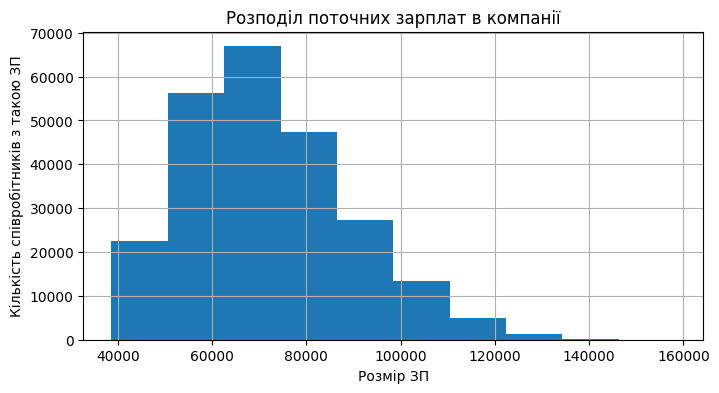

In [ ]:
to_date_9999 = res[res['to_date'].astype(str) == '9999-01-01']
plt.figure(figsize=(8, 4))
plt.hist(to_date_9999['salary'])
plt.grid(True)
plt.xlabel('Розмір ЗП')
plt.ylabel('Кількість співробітників з такою ЗП')
plt.title('Розподіл поточних зарплат в компанії')
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1j8MHLC1E0revbQLM9B0UJs6tVEgoWhmK)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [ ]:
con.close()